<a href="https://colab.research.google.com/github/nikhil0228/House_price_prediction/blob/main/House_Price_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/House%20Prices.csv")

# Printing first 5 records of the dataset
dataset.head(5)

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [5]:
dataset.shape


(21613, 21)

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 15
Float variables: 5


<Axes: >

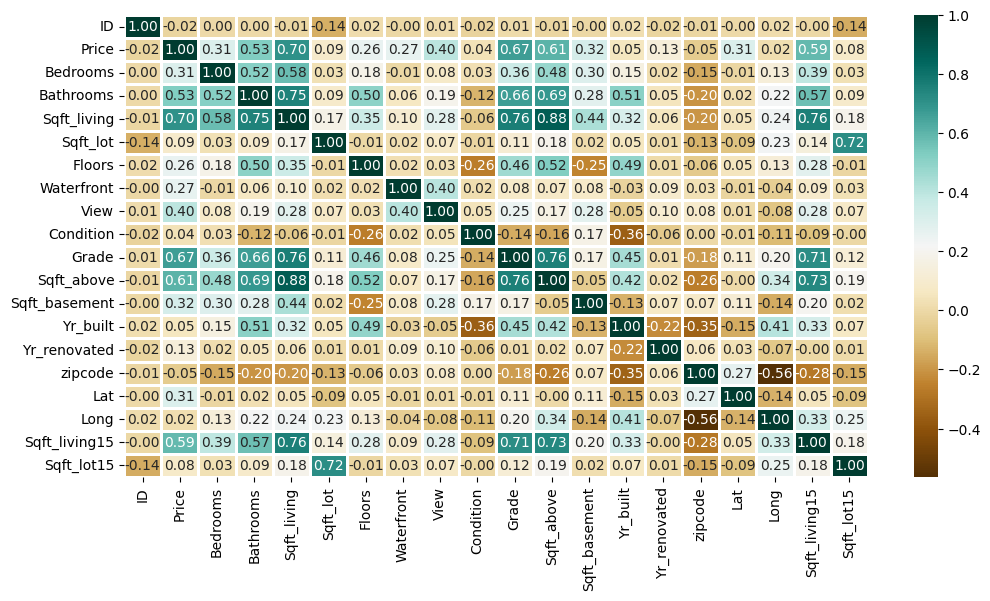

In [7]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

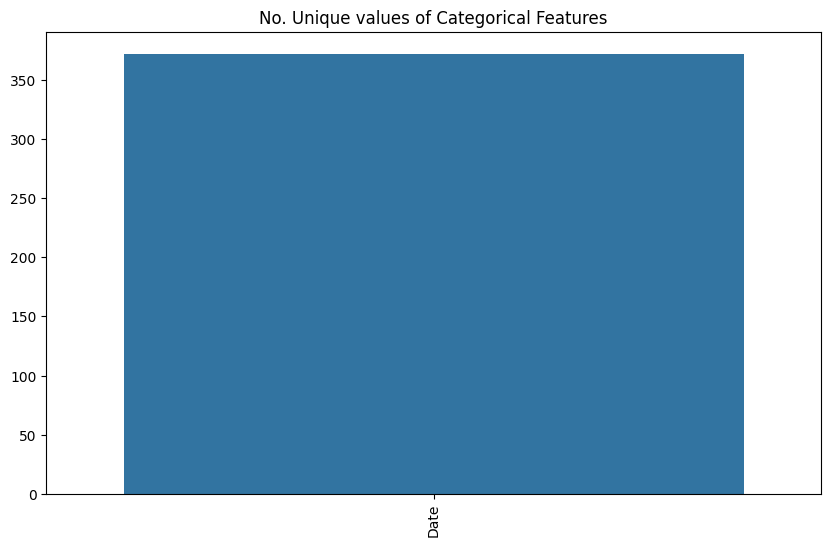

In [8]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

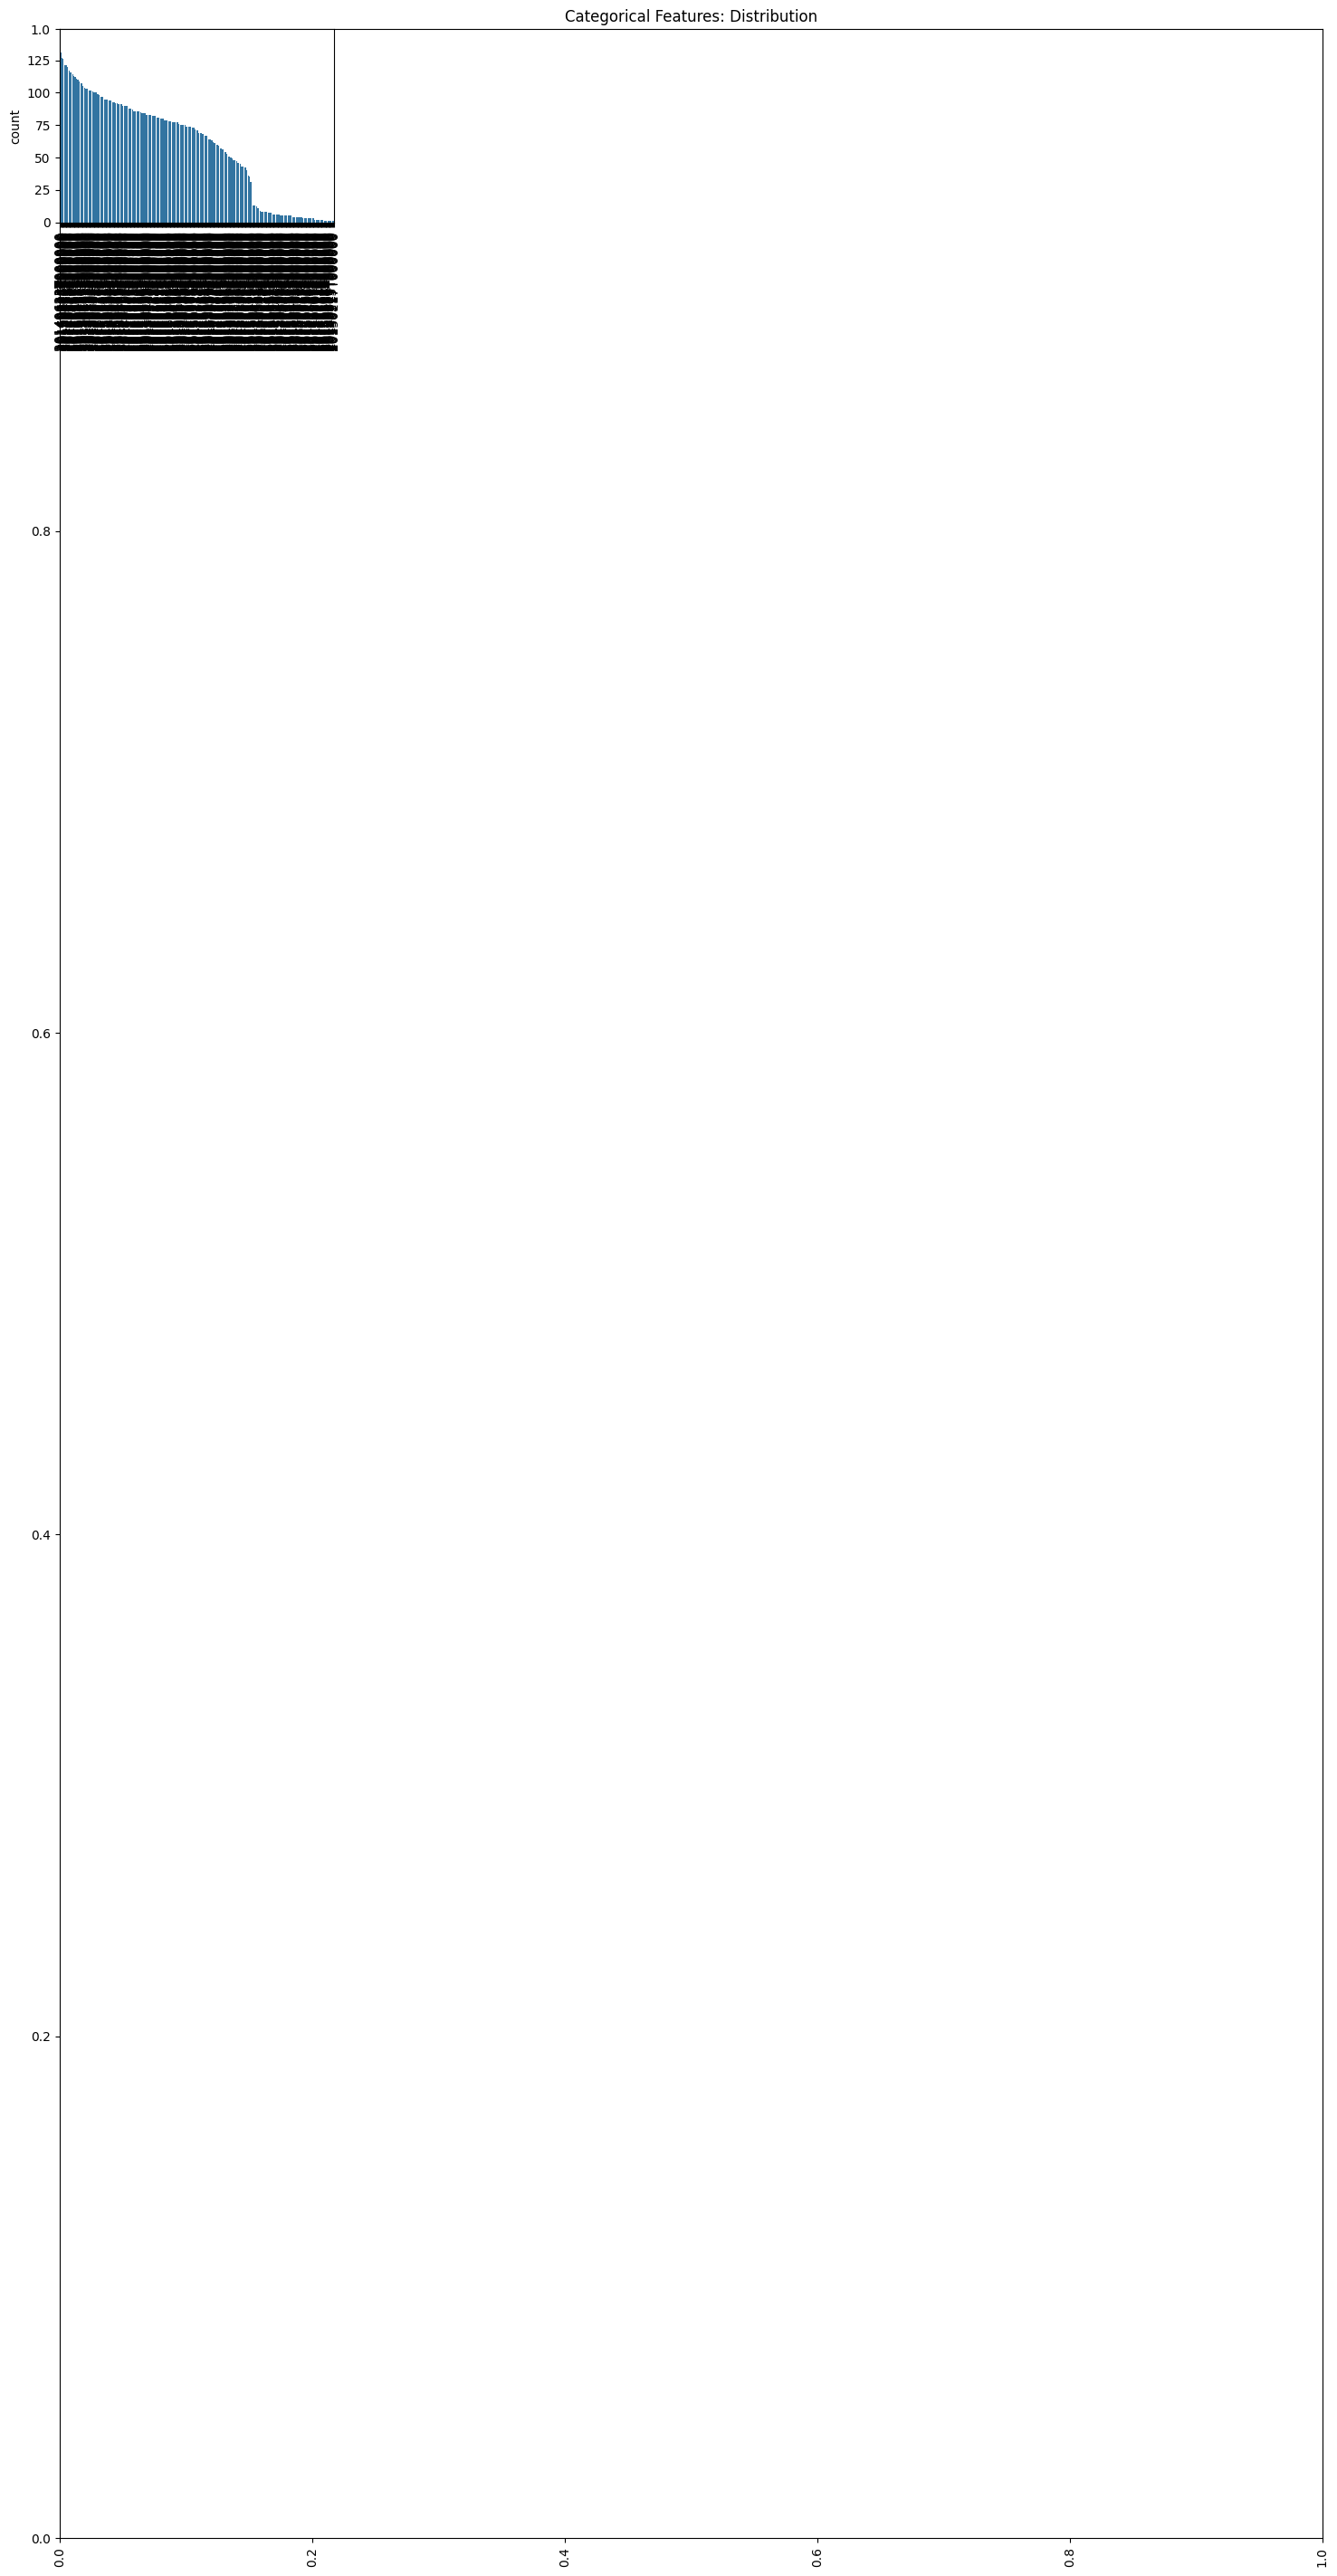

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [12]:
dataset.drop(['ID'],
             axis=1,
             inplace=True)

In [13]:
dataset.drop(['Condition'],
             axis=1,
             inplace=True)

In [15]:
dataset.drop(['Sqft_lot'],
             axis=1,
             inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21613 non-null  object 
 1   Price          21613 non-null  float64
 2   Bedrooms       21613 non-null  int64  
 3   Bathrooms      21613 non-null  float64
 4   Sqft_living    21613 non-null  int64  
 5   Floors         21613 non-null  float64
 6   Waterfront     21613 non-null  int64  
 7   View           21613 non-null  int64  
 8   Grade          21613 non-null  int64  
 9   Sqft_above     21613 non-null  int64  
 10  Sqft_basement  21613 non-null  int64  
 11  Yr_built       21613 non-null  int64  
 12  Yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  Lat            21613 non-null  float64
 15  Long           21613 non-null  float64
 16  Sqft_living15  21613 non-null  int64  
 17  Sqft_lot15     21613 non-null  int64  
dtypes: flo

In [17]:
dataset.isnull().sum()

,0
Date,0
Price,0
Bedrooms,0
Bathrooms,0
Sqft_living,0
Floors,0
Waterfront,0
View,0
Grade,0
Sqft_above,0


In [18]:
from sklearn.preprocessing import OneHotEncoder

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['Date']
No. of. categorical features:  1


In [21]:
# Convert 'Date' to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y%m%dT%H%M%S')

# Extract Year and Month
dataset['Year_sold'] = dataset['Date'].dt.year
dataset['Month_sold'] = dataset['Date'].dt.month

# Drop original 'Date' column after extraction
dataset.drop('Date', axis=1, inplace=True)


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dataset.drop(['Price'], axis=1)
Y = dataset['Price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.4184044265275348


In [26]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.13696850243505548

In [27]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.2611048098666909


In [29]:

!pip install catboost
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score



Learning rate set to 0.064232
0:	learn: 355299.5222686	total: 8.32ms	remaining: 8.31s
1:	learn: 341781.3720238	total: 13.8ms	remaining: 6.9s
2:	learn: 328564.6391655	total: 19.1ms	remaining: 6.34s
3:	learn: 316530.7270430	total: 24.5ms	remaining: 6.11s
4:	learn: 305011.1588055	total: 30ms	remaining: 5.97s
5:	learn: 294444.3050721	total: 35.5ms	remaining: 5.88s
6:	learn: 284481.2632684	total: 42.1ms	remaining: 5.97s
7:	learn: 275078.3422770	total: 47.2ms	remaining: 5.85s
8:	learn: 266433.3108798	total: 52.8ms	remaining: 5.81s
9:	learn: 258315.1325711	total: 58ms	remaining: 5.74s
10:	learn: 251103.7016819	total: 65.9ms	remaining: 5.92s
11:	learn: 243764.4438574	total: 71.1ms	remaining: 5.85s
12:	learn: 237319.3807988	total: 76.4ms	remaining: 5.8s
13:	learn: 230948.4429172	total: 82.9ms	remaining: 5.84s
14:	learn: 224716.9628591	total: 88.5ms	remaining: 5.81s
15:	learn: 218907.3728196	total: 93.6ms	remaining: 5.76s
16:	learn: 213679.3903478	total: 98.8ms	remaining: 5.71s
17:	learn: 208190

0.9065359855065376